In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np

In [3]:
pip install lightgbm

In [4]:
pip install optuna

     |████████████████████████████████| 308 kB 32.0 MB/s 
     |████████████████████████████████| 80 kB 9.0 MB/s 
     |████████████████████████████████| 209 kB 62.2 MB/s 
     |████████████████████████████████| 75 kB 5.3 MB/s 
     |████████████████████████████████| 144 kB 61.8 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 111 kB 58.0 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=520ed07bbda17afd9fe56af499a6dfa9e4e644a57c96059c34a20a84aeb364d2
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [5]:
from lightgbm import LGBMClassifier 

In [6]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [7]:
lgbm = LGBMClassifier()

In [8]:
X_train = np.load("/content/drive/MyDrive/2021_VIIT_P300_Session2 /Hackathon Oct 2021/XDawn/X.npy")
X_test = np.load("/content/drive/MyDrive/2021_VIIT_P300_Session2 /Hackathon Oct 2021/XDawn/X_test.npy")
Y_train = np.load("/content/drive/MyDrive/2021_VIIT_P300_Session2 /Hackathon Oct 2021/XDawn/Y.npy")
Y_test = np.load("/content/drive/MyDrive/2021_VIIT_P300_Session2 /Hackathon Oct 2021/XDawn/Y_test.npy")
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5670, 528), (3780, 528), (5670,), (3780,))

In [ ]:
lgbm.fit(X_train,Y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_preds=lgbm.predict(X_test)
cr = classification_report(Y_test,y_preds)
print(cr)

              precision    recall  f1-score   support

          -1       0.69      0.98      0.81      2100
           1       0.94      0.44      0.60      1680

    accuracy                           0.74      3780
   macro avg       0.81      0.71      0.70      3780
weighted avg       0.80      0.74      0.71      3780



In [ ]:
confusion_matrix(Y_test,y_preds)

array([[2054,   46],
       [ 944,  736]])

#AFTER HYPERPARAMETER TUNING

In [ ]:
pip install scikit-learn

In [ ]:
pip install optuna

In [ ]:
import optuna 
from optuna import Trial, visualization
from optuna.samplers import TPESampler
# from a import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
def objective(trial) -> float:
    
    # joblib.dump(study, 'study.pkl')
    
    # train_X,test_X,train_y,test_y = train_test_split(X, Y, test_size = 0.30,random_state = 101)
    # dtrain = lgb.Dataset(X_train, label=y_train)
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
 
    
    lgbm = LGBMClassifier(**param)
    lgbm.fit(X_train,Y_train)
    preds = lgbm.predict(X_test)
    # pred_labels = np.rint(preds)
    accuracy = accuracy_score(Y_test, preds)
    return accuracy
    

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2021-10-18 00:04:19,101] A new study created in memory with name: no-name-e6a6fbf8-e816-41a3-a85d-fc7bc33097a5
[I 2021-10-18 00:04:33,705] Trial 0 finished with value: 0.741005291005291 and parameters: {'lambda_l1': 0.0012683431183551424, 'lambda_l2': 1.0975324779056407e-08, 'num_leaves': 33, 'feature_fraction': 0.9602858155374536, 'bagging_fraction': 0.9331555864050891, 'bagging_freq': 7, 'min_child_samples': 25}. Best is trial 0 with value: 0.741005291005291.
[I 2021-10-18 00:04:44,005] Trial 1 finished with value: 0.7333333333333333 and parameters: {'lambda_l1': 7.007629320332666e-06, 'lambda_l2': 0.04811855471494027, 'num_leaves': 63, 'feature_fraction': 0.49975966524364984, 'bagging_fraction': 0.6254089366589277, 'bagging_freq': 4, 'min_child_samples': 20}. Best is trial 0 with value: 0.741005291005291.
[I 2021-10-18 00:04:50,294] Trial 2 finished with value: 0.7669312169312169 and parameters: {'lambda_l1': 0.02027743978730367, 'lambda_l2': 2.8207257956265796e-07, 'num_leaves':

In [ ]:
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 50
Best trial: {'lambda_l1': 0.36980911666622374, 'lambda_l2': 0.004880387722052703, 'num_leaves': 2, 'feature_fraction': 0.8108334659260682, 'bagging_fraction': 0.845011807928217, 'bagging_freq': 7, 'min_child_samples': 81}


In [ ]:
best_params=study.best_trial.params

In [ ]:
best_params, tuning_history = dict(), list()
# booster = lgbm.train(params, dtrain, valid_sets=dval,
#                     verbose_eval=0,
#                     best_params=best_params,
#                     tuning_history=tuning_history)
 
print( best_params)
print( tuning_history)

{}
[]


In [ ]:
lgbm = LGBMClassifier(**best_params)
lgbm.fit(X_train,Y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_train_preds = lgbm.predict(X_train)
cls1 = classification_report(Y_train,y_train_preds)
print(cls1)
print("------------COnfusion Matrix---------------")
confusion_matrix(Y_train,y_train_preds)

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      3150
           1       1.00      1.00      1.00      2520

    accuracy                           1.00      5670
   macro avg       1.00      1.00      1.00      5670
weighted avg       1.00      1.00      1.00      5670

------------COnfusion Matrix---------------


array([[3150,    0],
       [   0, 2520]])

In [ ]:
y_preds=lgbm.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
cls = classification_report(Y_test,y_preds)
print(cls)
print("------------COnfusion Matrix---------------")
confusion_matrix(Y_test,y_preds)


              precision    recall  f1-score   support

          -1       0.69      0.98      0.81      2100
           1       0.94      0.44      0.60      1680

    accuracy                           0.74      3780
   macro avg       0.81      0.71      0.70      3780
weighted avg       0.80      0.74      0.71      3780

------------COnfusion Matrix---------------


array([[2054,   46],
       [ 944,  736]])

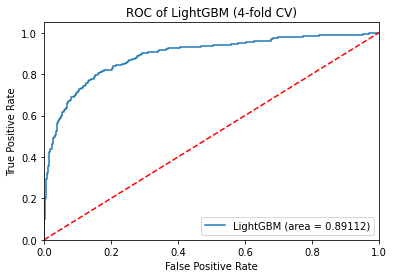

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict the probability of our label score
Y_pred_proba = lgbm.predict_proba(X_test)

r_roc_auc = roc_auc_score(Y_test, Y_pred_proba[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LightGBM (area = %0.5f)' % r_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of LightGBM (4-fold CV)')
plt.legend(loc="lower right")
# plt.savefig('images2/Randomforest_ROC')
plt.show()

In [ ]:
optuna.visualization.plot_param_importances(study)

#Now using F1 score as "Check" while training

In [ ]:
import optuna

In [ ]:
from sklearn.metrics import f1_score
def objective(trial) -> float:
    
    # joblib.dump(study, 'study.pkl')
    
    # train_X,test_X,train_y,test_y = train_test_split(X, Y, test_size = 0.30,random_state = 101)
    # dtrain = lgb.Dataset(X_train, label=y_train)
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
 
    
    lgbm = LGBMClassifier(**param,n_jobs=-1)
    lgbm.fit(X_train,Y_train)
    preds = lgbm.predict(X_test)
    # pred_labels = np.rint(preds)
    # Y_pred_proba = lgbm.predict_proba(X_test)
    # r_roc_auc = roc_auc_score(Y_test, Y_pred_proba[:,1])
    f1 = f1_score(Y_test, preds, average=None,pos_label=1)
    print(f1)
    return f1[1]
    

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2021-10-18 08:03:51,185] A new study created in memory with name: no-name-b4c386ec-4e0a-4b28-98ab-04e84ae514e0
[I 2021-10-18 08:04:08,317] Trial 0 finished with value: 0.5937117190690078 and parameters: {'lambda_l1': 3.072578710061083e-06, 'lambda_l2': 0.018569049177281187, 'num_leaves': 48, 'feature_fraction': 0.8986453429203328, 'bagging_fraction': 0.8313654445582765, 'bagging_freq': 5, 'min_child_samples': 31}. Best is trial 0 with value: 0.5937117190690078.


[0.80532185 0.59371172]


[I 2021-10-18 08:04:13,450] Trial 1 finished with value: 0.6261422328168454 and parameters: {'lambda_l1': 0.002732255316990132, 'lambda_l2': 0.834436682780316, 'num_leaves': 42, 'feature_fraction': 0.4413151439275071, 'bagging_fraction': 0.8246561270923748, 'bagging_freq': 4, 'min_child_samples': 84}. Best is trial 1 with value: 0.6261422328168454.


[0.81340472 0.62614223]


[I 2021-10-18 08:04:23,727] Trial 2 finished with value: 0.6460696128275323 and parameters: {'lambda_l1': 1.0246718237259533e-05, 'lambda_l2': 0.0001627383583111068, 'num_leaves': 214, 'feature_fraction': 0.9149525497378084, 'bagging_fraction': 0.7357129775851413, 'bagging_freq': 4, 'min_child_samples': 88}. Best is trial 2 with value: 0.6460696128275323.


[0.81910853 0.64606961]


[I 2021-10-18 08:04:32,001] Trial 3 finished with value: 0.6995183401259726 and parameters: {'lambda_l1': 9.277067923546607e-06, 'lambda_l2': 1.2270705964528973e-08, 'num_leaves': 15, 'feature_fraction': 0.924313868118179, 'bagging_fraction': 0.8032113655153112, 'bagging_freq': 7, 'min_child_samples': 6}. Best is trial 3 with value: 0.6995183401259726.


[0.8331619  0.69951834]


[I 2021-10-18 08:04:43,549] Trial 4 finished with value: 0.5897330595482546 and parameters: {'lambda_l1': 0.02305010318106593, 'lambda_l2': 0.0021427012880711016, 'num_leaves': 97, 'feature_fraction': 0.8384140302011689, 'bagging_fraction': 0.8832687279949091, 'bagging_freq': 4, 'min_child_samples': 76}. Best is trial 3 with value: 0.6995183401259726.


[0.80507317 0.58973306]


[I 2021-10-18 08:04:50,048] Trial 5 finished with value: 0.6878787878787879 and parameters: {'lambda_l1': 0.1060947538746009, 'lambda_l2': 1.8322357687210842e-05, 'num_leaves': 124, 'feature_fraction': 0.8584230526561583, 'bagging_fraction': 0.5435838616863017, 'bagging_freq': 6, 'min_child_samples': 92}. Best is trial 3 with value: 0.6995183401259726.


[0.83252033 0.68787879]


[I 2021-10-18 08:05:00,200] Trial 6 finished with value: 0.6274353876739562 and parameters: {'lambda_l1': 0.0030615132155051685, 'lambda_l2': 0.024170064982115932, 'num_leaves': 30, 'feature_fraction': 0.922503852712507, 'bagging_fraction': 0.8412858547033688, 'bagging_freq': 1, 'min_child_samples': 80}. Best is trial 3 with value: 0.6995183401259726.


[0.81427156 0.62743539]


[I 2021-10-18 08:05:12,982] Trial 7 finished with value: 0.6123436869705526 and parameters: {'lambda_l1': 0.09812085197137023, 'lambda_l2': 0.004418660226255645, 'num_leaves': 160, 'feature_fraction': 0.9178980385179958, 'bagging_fraction': 0.7190796530959327, 'bagging_freq': 2, 'min_child_samples': 49}. Best is trial 3 with value: 0.6995183401259726.


[0.810864   0.61234369]


[I 2021-10-18 08:05:22,840] Trial 8 finished with value: 0.6336633663366336 and parameters: {'lambda_l1': 1.1810200918260675e-05, 'lambda_l2': 4.107796728558565e-07, 'num_leaves': 212, 'feature_fraction': 0.8170951020446862, 'bagging_fraction': 0.5055777769843561, 'bagging_freq': 5, 'min_child_samples': 53}. Best is trial 3 with value: 0.6995183401259726.


[0.816286   0.63366337]


[I 2021-10-18 08:05:27,603] Trial 9 finished with value: 0.5967611336032388 and parameters: {'lambda_l1': 4.187105298109151e-07, 'lambda_l2': 2.673304078242064e-05, 'num_leaves': 83, 'feature_fraction': 0.42988913578201804, 'bagging_fraction': 0.6068593060686643, 'bagging_freq': 3, 'min_child_samples': 76}. Best is trial 3 with value: 0.6995183401259726.


[0.8043222  0.59676113]


[I 2021-10-18 08:05:31,057] Trial 10 finished with value: 0.7846510089315251 and parameters: {'lambda_l1': 1.6539337942943525e-08, 'lambda_l2': 1.4018739022401263e-08, 'num_leaves': 7, 'feature_fraction': 0.7125808074733704, 'bagging_fraction': 0.9856249148117036, 'bagging_freq': 7, 'min_child_samples': 15}. Best is trial 10 with value: 0.7846510089315251.


[0.85651311 0.78465101]


[I 2021-10-18 08:05:32,251] Trial 11 finished with value: 0.7902055622732769 and parameters: {'lambda_l1': 2.253621921535717e-08, 'lambda_l2': 1.120371847107964e-08, 'num_leaves': 2, 'feature_fraction': 0.6566467614900777, 'bagging_fraction': 0.9805339762741979, 'bagging_freq': 7, 'min_child_samples': 5}. Best is trial 11 with value: 0.7902055622732769.


[0.83678269 0.79020556]


[I 2021-10-18 08:05:34,293] Trial 12 finished with value: 0.7852412488174078 and parameters: {'lambda_l1': 1.957804313479344e-08, 'lambda_l2': 1.5758547594914597e-08, 'num_leaves': 4, 'feature_fraction': 0.6372629220246345, 'bagging_fraction': 0.9513127634239296, 'bagging_freq': 7, 'min_child_samples': 6}. Best is trial 11 with value: 0.7902055622732769.


[0.84483937 0.78524125]


[I 2021-10-18 08:05:49,272] Trial 13 finished with value: 0.5695198329853862 and parameters: {'lambda_l1': 1.1485333462817345e-08, 'lambda_l2': 9.22776489774798e-07, 'num_leaves': 69, 'feature_fraction': 0.5737011349459672, 'bagging_fraction': 0.9601963447205772, 'bagging_freq': 6, 'min_child_samples': 30}. Best is trial 11 with value: 0.7902055622732769.


[0.80038722 0.56951983]


[I 2021-10-18 08:05:50,872] Trial 14 finished with value: 0.7866291783817556 and parameters: {'lambda_l1': 8.896685705120718e-08, 'lambda_l2': 3.453324577310634e-07, 'num_leaves': 3, 'feature_fraction': 0.6316641146076705, 'bagging_fraction': 0.928608715954621, 'bagging_freq': 7, 'min_child_samples': 5}. Best is trial 11 with value: 0.7902055622732769.


[0.84331269 0.78662918]


[I 2021-10-18 08:06:12,979] Trial 15 finished with value: 0.529004329004329 and parameters: {'lambda_l1': 3.160620199401942e-07, 'lambda_l2': 6.27192527038607e-07, 'num_leaves': 176, 'feature_fraction': 0.5313676779556068, 'bagging_fraction': 0.8981100132809094, 'bagging_freq': 6, 'min_child_samples': 25}. Best is trial 11 with value: 0.7902055622732769.


[0.7927619  0.52900433]


[I 2021-10-18 08:06:21,492] Trial 16 finished with value: 0.6760994263862332 and parameters: {'lambda_l1': 0.0001341335554040221, 'lambda_l2': 2.8192499068797834e-07, 'num_leaves': 244, 'feature_fraction': 0.7250304914095829, 'bagging_fraction': 0.4329747669030781, 'bagging_freq': 5, 'min_child_samples': 47}. Best is trial 11 with value: 0.7902055622732769.


[0.82871587 0.67609943]


[I 2021-10-18 08:06:28,682] Trial 17 finished with value: 0.6546875000000001 and parameters: {'lambda_l1': 1.6337371080578806, 'lambda_l2': 3.815675841862779e-06, 'num_leaves': 61, 'feature_fraction': 0.6392741212120274, 'bagging_fraction': 0.6551342276660685, 'bagging_freq': 7, 'min_child_samples': 19}. Best is trial 11 with value: 0.7902055622732769.


[0.8232    0.6546875]


[I 2021-10-18 08:06:51,562] Trial 18 finished with value: 0.5433673469387755 and parameters: {'lambda_l1': 1.887887235296412e-07, 'lambda_l2': 1.0439261324987117e-07, 'num_leaves': 105, 'feature_fraction': 0.7567413616668468, 'bagging_fraction': 0.9938194904826292, 'bagging_freq': 6, 'min_child_samples': 37}. Best is trial 11 with value: 0.7902055622732769.


[0.7937788  0.54336735]


[I 2021-10-18 08:06:56,708] Trial 19 finished with value: 0.6602539438245478 and parameters: {'lambda_l1': 9.913324566169033e-05, 'lambda_l2': 5.483574733595068, 'num_leaves': 149, 'feature_fraction': 0.5187955924661484, 'bagging_fraction': 0.7644496145676705, 'bagging_freq': 3, 'min_child_samples': 62}. Best is trial 11 with value: 0.7902055622732769.


[0.82201169 0.66025394]


[I 2021-10-18 08:07:06,972] Trial 20 finished with value: 0.6192568917299242 and parameters: {'lambda_l1': 8.614890101276161e-08, 'lambda_l2': 1.1388583741046898e-05, 'num_leaves': 29, 'feature_fraction': 0.6400084070212193, 'bagging_fraction': 0.9119158269401836, 'bagging_freq': 6, 'min_child_samples': 14}. Best is trial 11 with value: 0.7902055622732769.


[0.81154835 0.61925689]


[I 2021-10-18 08:07:08,699] Trial 21 finished with value: 0.7985120892746437 and parameters: {'lambda_l1': 4.014889148209156e-08, 'lambda_l2': 5.303238922376057e-08, 'num_leaves': 3, 'feature_fraction': 0.6407502455623884, 'bagging_fraction': 0.9342344739985239, 'bagging_freq': 7, 'min_child_samples': 8}. Best is trial 21 with value: 0.7985120892746437.


[0.85002307 0.79851209]


[I 2021-10-18 08:07:09,866] Trial 22 finished with value: 0.7958875113395827 and parameters: {'lambda_l1': 1.3098056592539134e-06, 'lambda_l2': 6.086756852255761e-08, 'num_leaves': 2, 'feature_fraction': 0.5879171957426003, 'bagging_fraction': 0.9052012209446351, 'bagging_freq': 7, 'min_child_samples': 6}. Best is trial 21 with value: 0.7985120892746437.


[0.8412885  0.79588751]


[I 2021-10-18 08:07:19,393] Trial 23 finished with value: 0.6494522691705791 and parameters: {'lambda_l1': 8.208946749012874e-07, 'lambda_l2': 7.34747861884096e-08, 'num_leaves': 32, 'feature_fraction': 0.5630673939305194, 'bagging_fraction': 0.8844219346700735, 'bagging_freq': 7, 'min_child_samples': 19}. Best is trial 21 with value: 0.7985120892746437.


[0.82094325 0.64945227]


[I 2021-10-18 08:07:34,092] Trial 24 finished with value: 0.5585128855090832 and parameters: {'lambda_l1': 1.4905386338127546e-06, 'lambda_l2': 5.427735007359171e-08, 'num_leaves': 62, 'feature_fraction': 0.48183719257285296, 'bagging_fraction': 0.9955685083155033, 'bagging_freq': 5, 'min_child_samples': 11}. Best is trial 21 with value: 0.7985120892746437.


[0.79876757 0.55851289]


[I 2021-10-18 08:07:43,332] Trial 25 finished with value: 0.6656441717791411 and parameters: {'lambda_l1': 5.806908365673934e-08, 'lambda_l2': 1.8518190485395918e-06, 'num_leaves': 22, 'feature_fraction': 0.772426363819165, 'bagging_fraction': 0.8700976217212415, 'bagging_freq': 6, 'min_child_samples': 21}. Best is trial 21 with value: 0.7985120892746437.


[0.82390953 0.66564417]


[I 2021-10-18 08:07:53,366] Trial 26 finished with value: 0.6596736596736598 and parameters: {'lambda_l1': 2.3399974044866334e-05, 'lambda_l2': 0.00011801303041104743, 'num_leaves': 51, 'feature_fraction': 0.9852459513718279, 'bagging_fraction': 0.7820717829368575, 'bagging_freq': 7, 'min_child_samples': 100}. Best is trial 21 with value: 0.7985120892746437.


[0.82430806 0.65967366]


[I 2021-10-18 08:08:11,585] Trial 27 finished with value: 0.5680770842061165 and parameters: {'lambda_l1': 2.2875355742737676e-06, 'lambda_l2': 5.439628700538827e-08, 'num_leaves': 84, 'feature_fraction': 0.6865470496154389, 'bagging_fraction': 0.9428010347717395, 'bagging_freq': 6, 'min_child_samples': 39}. Best is trial 21 with value: 0.7985120892746437.


[0.80069592 0.56807708]


[I 2021-10-18 08:08:18,223] Trial 28 finished with value: 0.6669218989280244 and parameters: {'lambda_l1': 5.216939161710153e-08, 'lambda_l2': 3.843449929430396e-06, 'num_leaves': 20, 'feature_fraction': 0.5868573576044757, 'bagging_fraction': 0.6641486412493968, 'bagging_freq': 7, 'min_child_samples': 12}. Best is trial 21 with value: 0.7985120892746437.


[0.82417138 0.6669219 ]


[I 2021-10-18 08:08:31,128] Trial 29 finished with value: 0.6013871889024888 and parameters: {'lambda_l1': 2.5904533851095326e-06, 'lambda_l2': 1.10059139488856e-07, 'num_leaves': 45, 'feature_fraction': 0.6820937533835909, 'bagging_fraction': 0.830377508176102, 'bagging_freq': 5, 'min_child_samples': 30}. Best is trial 21 with value: 0.7985120892746437.


[0.80876884 0.60138719]


[I 2021-10-18 08:08:43,754] Trial 30 finished with value: 0.5781637717121588 and parameters: {'lambda_l1': 4.88750810698775e-07, 'lambda_l2': 1.2339216836414684e-08, 'num_leaves': 45, 'feature_fraction': 0.6113779459570361, 'bagging_fraction': 0.9247542098024581, 'bagging_freq': 5, 'min_child_samples': 24}. Best is trial 21 with value: 0.7985120892746437.


[0.80163361 0.57816377]


[I 2021-10-18 08:08:48,318] Trial 31 finished with value: 0.7203147353361946 and parameters: {'lambda_l1': 8.079488574747089e-08, 'lambda_l2': 1.678224209176811e-07, 'num_leaves': 10, 'feature_fraction': 0.6738672368622816, 'bagging_fraction': 0.9363056328903439, 'bagging_freq': 7, 'min_child_samples': 5}. Best is trial 21 with value: 0.7985120892746437.


[0.83585223 0.72031474]


[I 2021-10-18 08:08:51,018] Trial 32 finished with value: 0.7618724559023066 and parameters: {'lambda_l1': 1.378206194972197e-07, 'lambda_l2': 4.5684745212887064e-08, 'num_leaves': 7, 'feature_fraction': 0.5292653489094443, 'bagging_fraction': 0.8466978104774231, 'bagging_freq': 7, 'min_child_samples': 10}. Best is trial 21 with value: 0.7985120892746437.


[0.84778838 0.76187246]


[I 2021-10-18 08:09:00,963] Trial 33 finished with value: 0.6348203711014607 and parameters: {'lambda_l1': 2.8537974661288156e-08, 'lambda_l2': 0.13673431677287645, 'num_leaves': 30, 'feature_fraction': 0.6075077962144129, 'bagging_fraction': 0.9665824430974702, 'bagging_freq': 6, 'min_child_samples': 16}. Best is trial 21 with value: 0.7985120892746437.


[0.81599363 0.63482037]


[I 2021-10-18 08:09:03,452] Trial 34 finished with value: 0.7669074195666448 and parameters: {'lambda_l1': 1.0547039496945934e-08, 'lambda_l2': 9.602240846249272e-07, 'num_leaves': 5, 'feature_fraction': 0.6528102380082392, 'bagging_fraction': 0.9281137597915186, 'bagging_freq': 7, 'min_child_samples': 5}. Best is trial 21 with value: 0.7985120892746437.


[0.84271156 0.76690742]


[I 2021-10-18 08:09:13,146] Trial 35 finished with value: 0.5952575633687653 and parameters: {'lambda_l1': 0.0007974344375733983, 'lambda_l2': 3.309925861350453e-08, 'num_leaves': 37, 'feature_fraction': 0.48496141598860676, 'bagging_fraction': 0.8079820462153904, 'bagging_freq': 7, 'min_child_samples': 10}. Best is trial 21 with value: 0.7985120892746437.


[0.80641377 0.59525756]


[I 2021-10-18 08:09:21,215] Trial 36 finished with value: 0.6912373072583677 and parameters: {'lambda_l1': 2.1902380968214137e-07, 'lambda_l2': 2.937912855064745e-07, 'num_leaves': 19, 'feature_fraction': 0.7596714406593333, 'bagging_fraction': 0.866482566119752, 'bagging_freq': 6, 'min_child_samples': 28}. Best is trial 21 with value: 0.7985120892746437.


[0.83248317 0.69123731]


[I 2021-10-18 08:09:22,477] Trial 37 finished with value: 0.7904445116419716 and parameters: {'lambda_l1': 5.636733696378233e-06, 'lambda_l2': 0.0008136279761223617, 'num_leaves': 2, 'feature_fraction': 0.7268799652367405, 'bagging_fraction': 0.9010746322116443, 'bagging_freq': 4, 'min_child_samples': 20}. Best is trial 21 with value: 0.7985120892746437.


[0.8370562  0.79044451]


[I 2021-10-18 08:09:37,319] Trial 38 finished with value: 0.6077079107505072 and parameters: {'lambda_l1': 1.1381879661516406e-05, 'lambda_l2': 0.0009866845633719336, 'num_leaves': 46, 'feature_fraction': 0.7898745084884958, 'bagging_fraction': 0.89863405080811, 'bagging_freq': 4, 'min_child_samples': 37}. Best is trial 21 with value: 0.7985120892746437.


[0.81020608 0.60770791]


[I 2021-10-18 08:09:57,630] Trial 39 finished with value: 0.552776600254345 and parameters: {'lambda_l1': 3.565254273047133e-05, 'lambda_l2': 0.00025523064974915634, 'num_leaves': 75, 'feature_fraction': 0.7219824805649325, 'bagging_fraction': 0.786480553060716, 'bagging_freq': 3, 'min_child_samples': 21}. Best is trial 21 with value: 0.7985120892746437.


[0.79715439 0.5527766 ]


[I 2021-10-18 08:10:09,364] Trial 40 finished with value: 0.6168674698795181 and parameters: {'lambda_l1': 8.655095499646764e-07, 'lambda_l2': 7.289952834430461e-05, 'num_leaves': 101, 'feature_fraction': 0.872804143302859, 'bagging_fraction': 0.7410934880038068, 'bagging_freq': 4, 'min_child_samples': 70}. Best is trial 21 with value: 0.7985120892746437.


[0.81183432 0.61686747]


[I 2021-10-18 08:10:16,169] Trial 41 finished with value: 0.6740037950664136 and parameters: {'lambda_l1': 4.798850479284134e-08, 'lambda_l2': 0.012101424914995388, 'num_leaves': 18, 'feature_fraction': 0.6104081124290713, 'bagging_fraction': 0.9693475324744003, 'bagging_freq': 1, 'min_child_samples': 7}. Best is trial 21 with value: 0.7985120892746437.


[0.82558376 0.6740038 ]


[I 2021-10-18 08:10:19,039] Trial 42 finished with value: 0.7718832891246685 and parameters: {'lambda_l1': 4.532809752950755e-06, 'lambda_l2': 0.0007116151771902164, 'num_leaves': 6, 'feature_fraction': 0.6666561016625502, 'bagging_fraction': 0.9133296736324719, 'bagging_freq': 4, 'min_child_samples': 16}. Best is trial 21 with value: 0.7985120892746437.


[0.84859155 0.77188329]


[I 2021-10-18 08:10:27,560] Trial 43 finished with value: 0.6625577812018488 and parameters: {'lambda_l1': 1.7952784589857015e-07, 'lambda_l2': 2.160229675134643e-08, 'num_leaves': 21, 'feature_fraction': 0.7043165938819224, 'bagging_fraction': 0.8544053924371726, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 21 with value: 0.7985120892746437.


[0.82352941 0.66255778]


[I 2021-10-18 08:10:28,702] Trial 44 finished with value: 0.8022870899789347 and parameters: {'lambda_l1': 3.6745621644927164e-06, 'lambda_l2': 0.047287391700002034, 'num_leaves': 2, 'feature_fraction': 0.5510039298865734, 'bagging_fraction': 0.9635294277302334, 'bagging_freq': 7, 'min_child_samples': 5}. Best is trial 44 with value: 0.8022870899789347.


[0.84493746 0.80228709]


[I 2021-10-18 08:10:42,846] Trial 45 finished with value: 0.6024489795918367 and parameters: {'lambda_l1': 4.635757261963128e-06, 'lambda_l2': 0.12122130210995079, 'num_leaves': 55, 'feature_fraction': 0.5693263045037544, 'bagging_fraction': 0.9691938042752584, 'bagging_freq': 4, 'min_child_samples': 16}. Best is trial 44 with value: 0.8022870899789347.


[0.80939335 0.60244898]


[I 2021-10-18 08:10:58,071] Trial 46 finished with value: 0.6051032806804374 and parameters: {'lambda_l1': 0.0005586904801556164, 'lambda_l2': 0.06147025724349578, 'num_leaves': 38, 'feature_fraction': 0.7388208088833266, 'bagging_fraction': 0.9989506979561934, 'bagging_freq': 2, 'min_child_samples': 11}. Best is trial 44 with value: 0.8022870899789347.


[0.80848556 0.60510328]


[I 2021-10-18 08:11:11,856] Trial 47 finished with value: 0.5439795046968403 and parameters: {'lambda_l1': 4.270224591311525e-05, 'lambda_l2': 1.5222253519821813, 'num_leaves': 123, 'feature_fraction': 0.4627260232732113, 'bagging_fraction': 0.8834215432524081, 'bagging_freq': 7, 'min_child_samples': 8}. Best is trial 44 with value: 0.8022870899789347.


[0.79532388 0.5439795 ]


[I 2021-10-18 08:11:20,989] Trial 48 finished with value: 0.5240363793850151 and parameters: {'lambda_l1': 1.0075661797383776e-06, 'lambda_l2': 0.4802100112410244, 'num_leaves': 198, 'feature_fraction': 0.40625960688052626, 'bagging_fraction': 0.8171346593973033, 'bagging_freq': 5, 'min_child_samples': 25}. Best is trial 44 with value: 0.8022870899789347.


[0.79070653 0.52403638]


[I 2021-10-18 08:11:25,434] Trial 49 finished with value: 0.6839145106861642 and parameters: {'lambda_l1': 6.949962308370809e-06, 'lambda_l2': 0.0023279489409318956, 'num_leaves': 15, 'feature_fraction': 0.5480872839048949, 'bagging_fraction': 0.550723044103824, 'bagging_freq': 2, 'min_child_samples': 34}. Best is trial 44 with value: 0.8022870899789347.


[0.82771306 0.68391451]


In [ ]:
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 50
Best trial: {'lambda_l1': 3.6745621644927164e-06, 'lambda_l2': 0.047287391700002034, 'num_leaves': 2, 'feature_fraction': 0.5510039298865734, 'bagging_fraction': 0.9635294277302334, 'bagging_freq': 7, 'min_child_samples': 5}


In [ ]:
best_params=study.best_trial.params

In [9]:
best_params={'lambda_l1': 3.6745621644927164e-06, 'lambda_l2': 0.047287391700002034, 'num_leaves': 2, 'feature_fraction': 0.5510039298865734, 'bagging_fraction': 0.9635294277302334, 'bagging_freq': 7, 'min_child_samples': 5}

In [10]:
lgbm = LGBMClassifier(**best_params)
lgbm.fit(X_train,Y_train)

LGBMClassifier(bagging_fraction=0.9635294277302334, bagging_freq=7,
               boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.5510039298865734, importance_type='split',
               lambda_l1=3.6745621644927164e-06, lambda_l2=0.047287391700002034,
               learning_rate=0.1, max_depth=-1, min_child_samples=5,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=2, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [11]:
X_train.shape,Y_train.shape

((5670, 528), (5670,))

In [12]:
y_train_preds = lgbm.predict(X_train)
cls1 = classification_report(Y_train,y_train_preds)
print(cls1)
print("------------COnfusion Matrix---------------")
confusion_matrix(Y_train,y_train_preds)

              precision    recall  f1-score   support

          -1       0.82      0.87      0.84      3150
           1       0.83      0.75      0.79      2520

    accuracy                           0.82      5670
   macro avg       0.82      0.81      0.82      5670
weighted avg       0.82      0.82      0.82      5670

------------COnfusion Matrix---------------


array([[2756,  394],
       [ 623, 1897]])

In [13]:
y_preds=lgbm.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
cls = classification_report(Y_test,y_preds)
print(cls)
print("------------COnfusion Matrix---------------")

confusion_matrix(Y_test,y_preds)


              precision    recall  f1-score   support

          -1       0.84      0.85      0.84      2100
           1       0.81      0.79      0.80      1680

    accuracy                           0.83      3780
   macro avg       0.82      0.82      0.82      3780
weighted avg       0.83      0.83      0.83      3780

------------COnfusion Matrix---------------


array([[1790,  310],
       [ 347, 1333]])

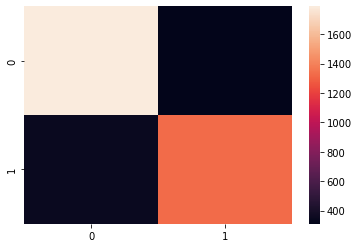

In [17]:
import seaborn as sns
cf = confusion_matrix(Y_test,y_preds)
sns.heatmap(cf)

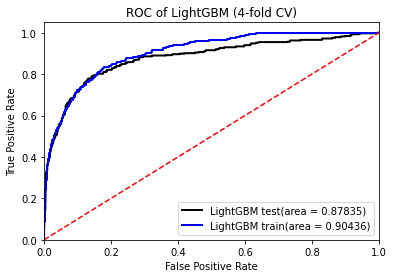

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict the probability of our label score
Y_pred_proba = lgbm.predict_proba(X_test)
Y_pred_train = lgbm.predict_proba(X_train)
r_roc_auc = roc_auc_score(Y_test, Y_pred_proba[:,1])
r_roc_auc_train = roc_auc_score(Y_train, Y_pred_train[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba[:,1])
fpr_train, tpr_train ,_ = roc_curve(Y_train, Y_pred_train[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LightGBM test(area = %0.5f)' % r_roc_auc,color='black',
          lw=2)
plt.plot(fpr_train, tpr_train, label='LightGBM train(area = %0.5f)' % r_roc_auc_train,color='blue',
          lw=2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of LightGBM (4-fold CV)')
plt.legend(loc="lower right")
# plt.savefig('images2/Randomforest_ROC')
plt.show()

In [ ]:
optuna.visualization.plot_param_importances(study)